In [1]:
import numpy
import math

import matplotlib.pyplot as plt

from sympy import *
init_printing()

# Electrical

In [2]:
Im, It = symbols('I_m I_t')
rm, rb = symbols('r_m r_b')
Vb, Vemf, Va = symbols('V_b V_emf V_a')
nm = symbols('n_m')
w = symbols('omega')
ke, km = symbols('k_e k_m')

In [3]:
VaEqu = Eq(Va, Vb - It*rb)
VaEqu

In [4]:
VbEqu = VaEqu.subs(Va, Im*rm + ke*w).subs(It, nm*Im)
VbEqu

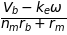

In [5]:
ImVal = solve(VbEqu, Im)[0]
ImVal

# Kinematics

In [21]:
Tr, Tf, Tw, Tm = symbols('tau_r tau_f tau_w tau_m')
g = symbols('g_r')
Ir = symbols('I_r')
alpha, m, rw = symbols('alpha m r_w')
v = symbols('v')
gamma = symbols('gamma')
Mi = symbols('M_i')

In [7]:
TorqueEqu = Eq(nm * Tm, Mi * alpha + gamma * w + Tf)
TorqueEqu

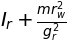

In [8]:
MiVal = m*rw**2 / g**2 + Ir
MiVal

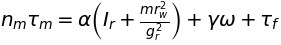

In [9]:
TorqueEqu2 = TorqueEqu.subs(Mi, MiVal)
TorqueEqu2

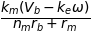

In [10]:
TmVal = ImVal * km
TmVal

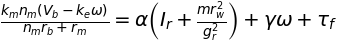

In [11]:
AlphaEqu = TorqueEqu2.subs(Tm, TmVal)
AlphaEqu

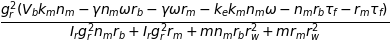

In [12]:
AlphaVal = solve(AlphaEqu, alpha)[0]
AlphaVal

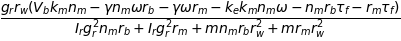

In [13]:
AcelVal = AlphaVal * rw / g
AcelVal

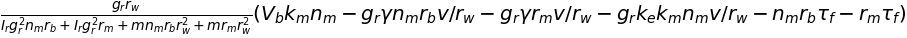

In [22]:
AcelVal2 = AcelVal.subs(w, v*g/rw)
AcelVal2

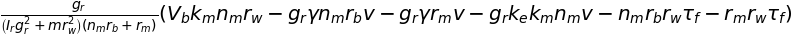

In [23]:
p1, p2, p3, p4 = AcelVal2.args
p1 * p2 * p4.factor(w) * p3.factor()

# Substitution

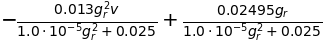

In [24]:
operating_voltage = 12.6
motor_num = 4
battery_resistance = 0.1
motor_resistance = 0.1
friction_torque = 0.01
gamma_val = 0.01
inertia_rotor = 0.00002
mass = 20
torque_const = 0.01
emf_const = 0.2
wheel_radius = 0.05

subList = [(Vb, operating_voltage), (nm, motor_num), (rb, battery_resistance), (rm, motor_resistance),
           (Tf, friction_torque), (gamma, gamma_val), (Ir, inertia_rotor), (m, mass), (km, torque_const),
           (ke, emf_const), (rw, wheel_radius)]

Acel3 = AcelVal2.subs(subList)
Acel3.expand()